In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('wolfsburg.csv')
df.head()

,day,interval,detid,flow,occ,error,city,speed
0,2016-09-19,0,K204D1A,0.0,0.000000,NaN,wolfsburg,NaN
1,2016-09-19,180,K204D1A,20.0,0.001833,NaN,wolfsburg,NaN
2,2016-09-19,360,K204D1A,60.0,0.029267,NaN,wolfsburg,NaN
3,2016-09-19,540,K204D1A,60.0,0.010733,NaN,wolfsburg,NaN
4,2016-09-19,720,K204D1A,20.0,0.001767,NaN,wolfsburg,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893672 entries, 0 to 893671
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   day       893672 non-null  object 
 1   interval  893672 non-null  int64  
 2   detid     893672 non-null  object 
 3   flow      893672 non-null  float64
 4   occ       893648 non-null  float64
 5   error     286900 non-null  float64
 6   city      893672 non-null  object 
 7   speed     0 non-null       float64
dtypes: float64(4), int64(1), object(3)
memory usage: 54.5+ MB


In [6]:
df.dtypes

day          object
interval      int64
detid        object
flow        float64
occ         float64
error       float64
city         object
speed       float64
dtype: object

In [7]:
df.shape

(893672, 8)

In [8]:
df.columns

Index(['day', 'interval', 'detid', 'flow', 'occ', 'error', 'city', 'speed'], dtype='object')

In [9]:
df.describe()

,interval,flow,occ,error,speed
count,893672.000000,893672.000000,893648.000000,286900.0,0.0
mean,43109.772803,189.019904,0.062168,1.0,NaN
std,24942.679477,240.224389,0.132824,0.0,NaN
min,0.000000,0.000000,0.000000,1.0,NaN
25%,21420.000000,20.000000,0.001567,1.0,NaN
50%,43020.000000,80.000000,0.013667,1.0,NaN
75%,64800.000000,300.000000,0.053333,1.0,NaN
max,86220.000000,4440.000000,1.000000,1.0,NaN


In [11]:
print(df.isnull().sum())

day              0
interval         0
detid            0
flow             0
occ             24
error       606772
city             0
speed       893672
dtype: int64


In [12]:
df.duplicated().sum()

np.int64(0)

In [15]:
print(df['error'].describe())

count    286900.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: error, dtype: float64


In [18]:
print(df['speed'].describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: speed, dtype: float64


In [19]:
df.drop('speed',axis=1,inplace=True)
df.drop('error', axis=1, inplace=True)

In [20]:
df.head()

,day,interval,detid,flow,occ,city
0,2016-09-19,0,K204D1A,0.0,0.000000,wolfsburg
1,2016-09-19,180,K204D1A,20.0,0.001833,wolfsburg
2,2016-09-19,360,K204D1A,60.0,0.029267,wolfsburg
3,2016-09-19,540,K204D1A,60.0,0.010733,wolfsburg
4,2016-09-19,720,K204D1A,20.0,0.001767,wolfsburg


In [21]:
df = df.drop(df.index[0])
df.head()

,day,interval,detid,flow,occ,city
1,2016-09-19,180,K204D1A,20.0,0.001833,wolfsburg
2,2016-09-19,360,K204D1A,60.0,0.029267,wolfsburg
3,2016-09-19,540,K204D1A,60.0,0.010733,wolfsburg
4,2016-09-19,720,K204D1A,20.0,0.001767,wolfsburg
5,2016-09-19,900,K204D1A,0.0,0.000000,wolfsburg


In [22]:
df.isna().sum()

day          0
interval     0
detid        0
flow         0
occ         24
city         0
dtype: int64

In [23]:
df.describe()

,interval,flow,occ
count,893671.000000,893671.000000,893647.000000
mean,43109.821042,189.020116,0.062168
std,24942.651745,240.224441,0.132824
min,0.000000,0.000000,0.000000
25%,21420.000000,20.000000,0.001567
50%,43020.000000,80.000000,0.013667
75%,64800.000000,300.000000,0.053333
max,86220.000000,4440.000000,1.000000


# Visualisasi Data

In [25]:
# Identifikasi kolom numerik dan kategorikal
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Kolom numerik: {numeric_cols}")
print(f"Kolom kategorikal: {categorical_cols}")
print(f"Shape dataset: {df.shape}")

Kolom numerik: ['interval', 'flow', 'occ']
Kolom kategorikal: ['day', 'detid', 'city', 'flow_category']
Shape dataset: (893671, 7)


## 1. Analisis Univariate - Variabel Numerik

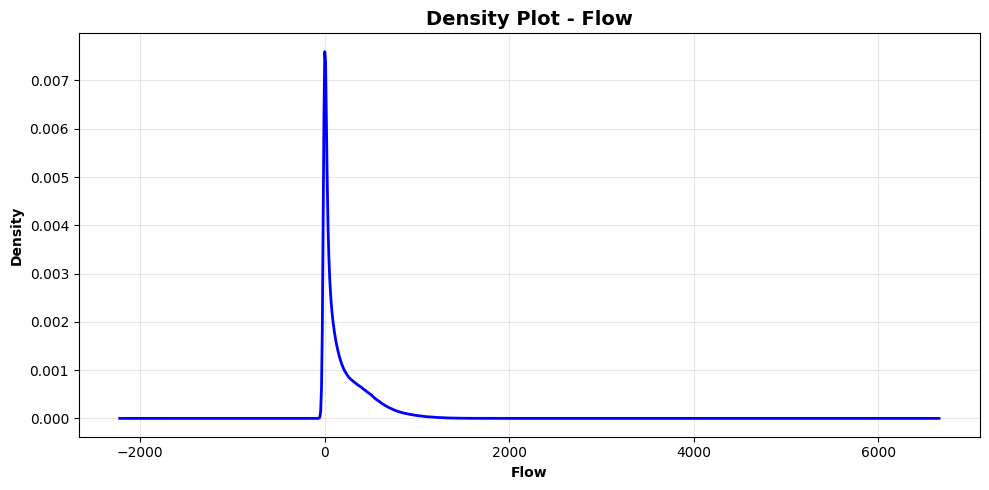

In [44]:
# Density Plot untuk Flow
plt.figure(figsize=(10, 5))
df['flow'].plot(kind='density', color='blue', linewidth=2)
plt.title('Density Plot - Flow', fontsize=14, fontweight='bold')
plt.xlabel('Flow', fontweight='bold')
plt.ylabel('Density', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

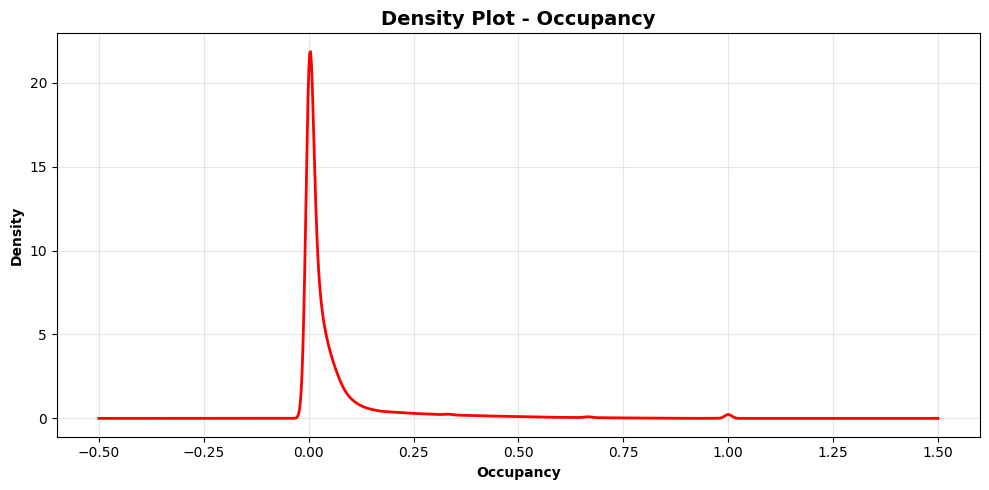

In [45]:
# Density Plot untuk Occupancy
plt.figure(figsize=(10, 5))
df['occ'].plot(kind='density', color='red', linewidth=2)
plt.title('Density Plot - Occupancy', fontsize=14, fontweight='bold')
plt.xlabel('Occupancy', fontweight='bold')
plt.ylabel('Density', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

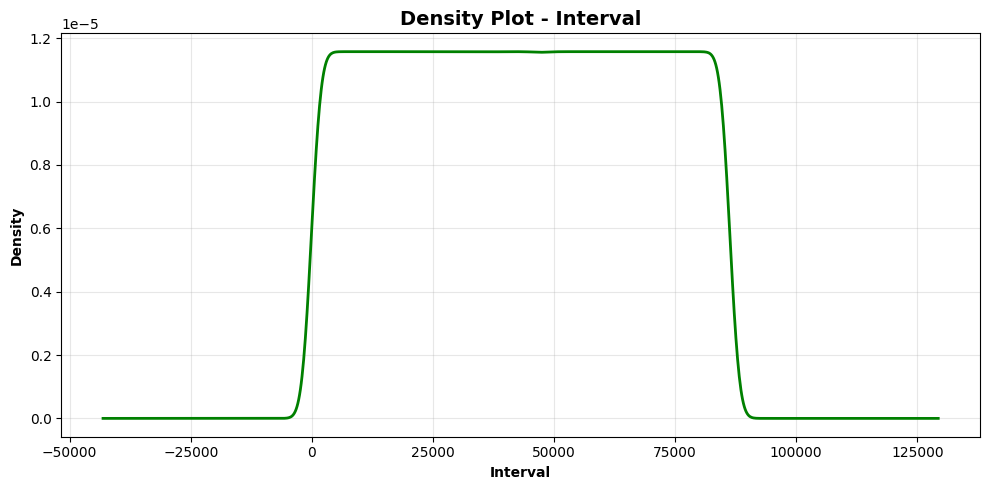

In [46]:
# Density Plot untuk Interval
plt.figure(figsize=(10, 5))
df['interval'].plot(kind='density', color='green', linewidth=2)
plt.title('Density Plot - Interval', fontsize=14, fontweight='bold')
plt.xlabel('Interval', fontweight='bold')
plt.ylabel('Density', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 2. Analisis Univariate - Variabel Kategorikal

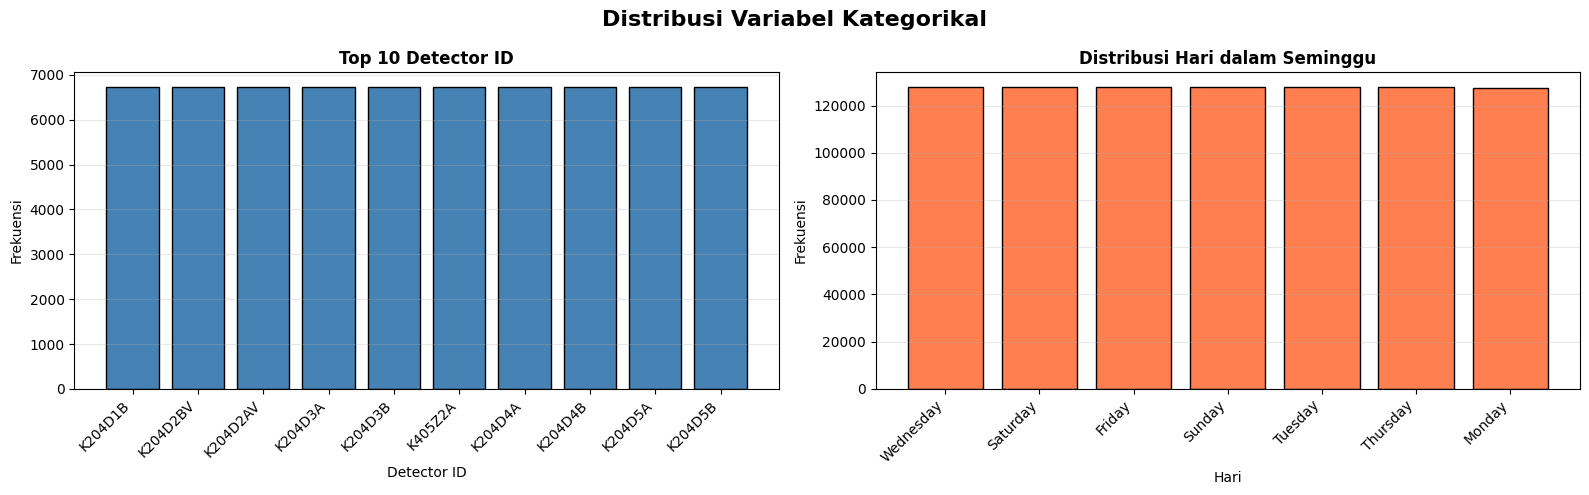

In [31]:
# Bar plot untuk variabel kategorikal
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('Distribusi Variabel Kategorikal', fontsize=16, fontweight='bold')

# Detector ID
detid_counts = df['detid'].value_counts().head(10)
axes[0].bar(range(len(detid_counts)), detid_counts.values, color='steelblue', edgecolor='black')
axes[0].set_xticks(range(len(detid_counts)))
axes[0].set_xticklabels(detid_counts.index, rotation=45, ha='right')
axes[0].set_title('Top 10 Detector ID', fontweight='bold')
axes[0].set_xlabel('Detector ID')
axes[0].set_ylabel('Frekuensi')
axes[0].grid(True, alpha=0.3, axis='y')

# Day (konversi ke datetime untuk analisis)
df['day_parsed'] = pd.to_datetime(df['day'])
df['day_of_week'] = df['day_parsed'].dt.day_name()
day_counts = df['day_of_week'].value_counts()
axes[1].bar(range(len(day_counts)), day_counts.values, color='coral', edgecolor='black')
axes[1].set_xticks(range(len(day_counts)))
axes[1].set_xticklabels(day_counts.index, rotation=45, ha='right')
axes[1].set_title('Distribusi Hari dalam Seminggu', fontweight='bold')
axes[1].set_xlabel('Hari')
axes[1].set_ylabel('Frekuensi')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

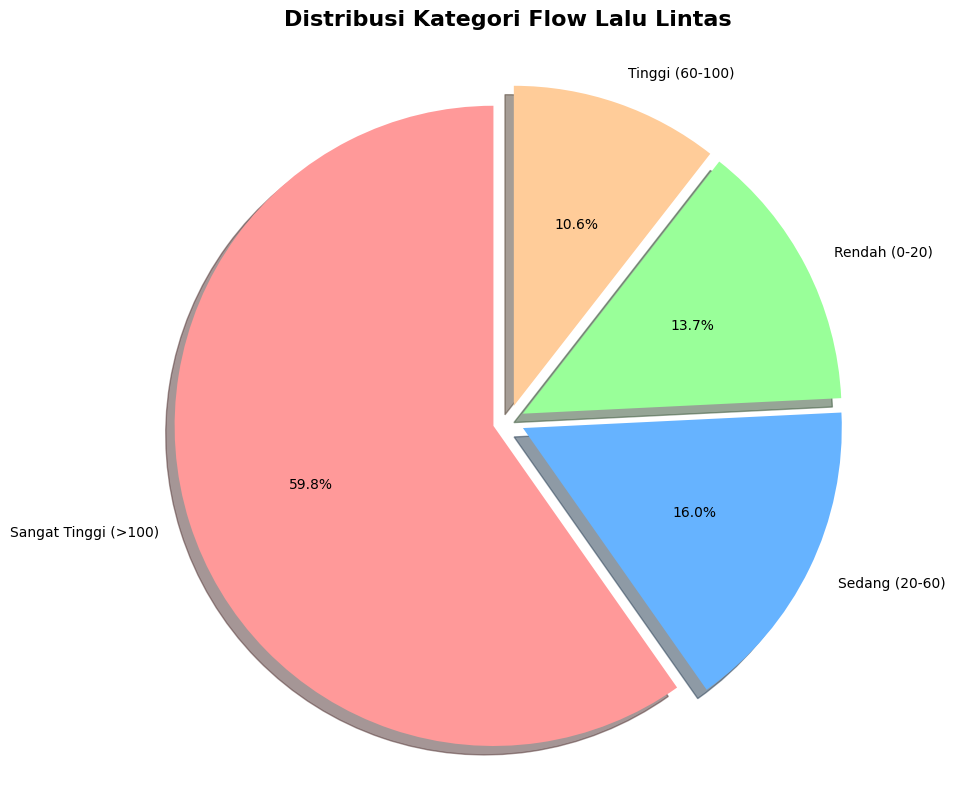


Jumlah per Kategori Flow:
flow_category
Sangat Tinggi (>100)    405800
Sedang (20-60)          108643
Rendah (0-20)            92756
Tinggi (60-100)          71729
Name: count, dtype: int64


In [32]:
# Pie Chart untuk distribusi flow berdasarkan kategori
df['flow_category'] = pd.cut(df['flow'], bins=[0, 20, 60, 100, df['flow'].max()], 
                               labels=['Rendah (0-20)', 'Sedang (20-60)', 'Tinggi (60-100)', 'Sangat Tinggi (>100)'])

flow_distribution = df['flow_category'].value_counts()

plt.figure(figsize=(10, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0.05, 0.05, 0.05, 0.05)

plt.pie(flow_distribution.values, labels=flow_distribution.index, autopct='%1.1f%%',
        colors=colors, explode=explode, shadow=True, startangle=90)
plt.title('Distribusi Kategori Flow Lalu Lintas', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Tampilkan jumlah untuk setiap kategori
print("\nJumlah per Kategori Flow:")
print(flow_distribution)

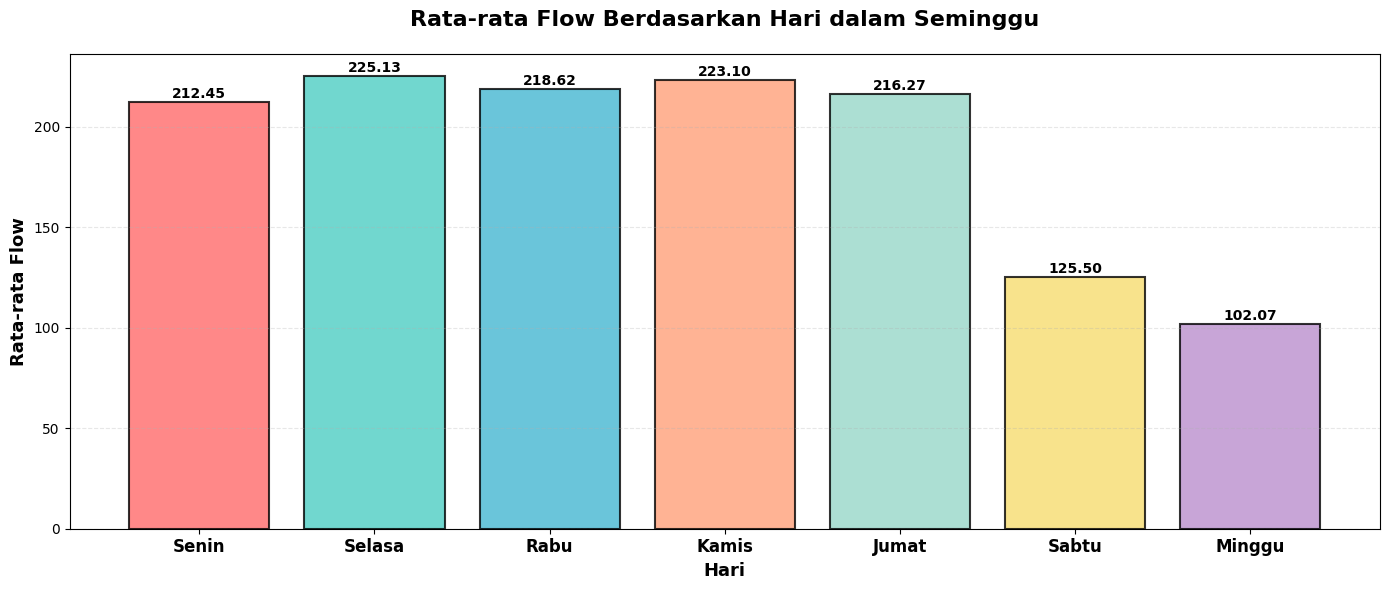


STATISTIK FLOW BERDASARKAN HARI
Senin      :   212.45
Selasa     :   225.13
Rabu       :   218.62
Kamis      :   223.10
Jumat      :   216.27
Sabtu      :   125.50
Minggu     :   102.07
----------------------------------------------------------------------
Rata-rata  :   189.02
Tertinggi  :   225.13 (Selasa)
Terendah   :   102.07 (Minggu)


In [49]:
# Bar chart untuk rata-rata flow berdasarkan hari (Senin-Minggu)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_order_id = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']

# Hitung rata-rata flow per hari
flow_by_day = df.groupby('day_of_week')['flow'].mean().reindex(day_order)

# Buat bar chart
plt.figure(figsize=(14, 6))
bars = plt.bar(range(len(day_order_id)), flow_by_day.values, 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE'],
               edgecolor='black', linewidth=1.5, alpha=0.8)

# Tambahkan nilai di atas setiap bar
for i, (bar, value) in enumerate(zip(bars, flow_by_day.values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{value:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.xticks(range(len(day_order_id)), day_order_id, fontsize=12, fontweight='bold')
plt.xlabel('Hari', fontsize=13, fontweight='bold')
plt.ylabel('Rata-rata Flow', fontsize=13, fontweight='bold')
plt.title('Rata-rata Flow Berdasarkan Hari dalam Seminggu', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Tampilkan statistik tambahan
print("\n" + "=" * 70)
print("STATISTIK FLOW BERDASARKAN HARI")
print("=" * 70)
for day_eng, day_id, flow_val in zip(day_order, day_order_id, flow_by_day.values):
    print(f"{day_id:10} : {flow_val:8.2f}")
print("-" * 70)
print(f"{'Rata-rata':10} : {flow_by_day.mean():8.2f}")
print(f"{'Tertinggi':10} : {flow_by_day.max():8.2f} ({day_order_id[flow_by_day.argmax()]})")
print(f"{'Terendah':10} : {flow_by_day.min():8.2f} ({day_order_id[flow_by_day.argmin()]})")
print("=" * 70)

In [50]:
# Total jumlah kendaraan (flow) di semua tanggal
total_flow = df['flow'].sum()
total_records = len(df)
avg_flow = df['flow'].mean()

# Hitung total flow per tanggal
flow_per_date = df.groupby('day')['flow'].sum().sort_values(ascending=False)

print("=" * 80)
print("TOTAL JUMLAH KENDARAAN DI SEMUA TANGGAL")
print("=" * 80)
print(f"\nTotal Kendaraan (Flow) di Semua Tanggal: {total_flow:,.0f}")
print(f"Total Record/Pengamatan: {total_records:,}")
print(f"Rata-rata Flow per Record: {avg_flow:.2f}")
print(f"Jumlah Tanggal Unik: {df['day'].nunique()}")
print(f"Rata-rata Flow per Tanggal: {flow_per_date.mean():.2f}")

print("\n" + "-" * 80)
print("TOP 10 TANGGAL DENGAN FLOW TERTINGGI:")
print("-" * 80)
for idx, (date, flow) in enumerate(flow_per_date.head(10).items(), 1):
    print(f"{idx:2d}. {date} : {flow:10,.0f}")

print("\n" + "-" * 80)
print("TOP 10 TANGGAL DENGAN FLOW TERENDAH:")
print("-" * 80)
for idx, (date, flow) in enumerate(flow_per_date.tail(10).iloc[::-1].items(), 1):
    print(f"{idx:2d}. {date} : {flow:10,.0f}")

print("\n" + "=" * 80)

TOTAL JUMLAH KENDARAAN DI SEMUA TANGGAL

Total Kendaraan (Flow) di Semua Tanggal: 168,921,796
Total Record/Pengamatan: 893,671
Rata-rata Flow per Record: 189.02
Jumlah Tanggal Unik: 14
Rata-rata Flow per Tanggal: 12065842.55

--------------------------------------------------------------------------------
TOP 10 TANGGAL DENGAN FLOW TERTINGGI:
--------------------------------------------------------------------------------
 1. 2016-09-20 : 14,931,582
 2. 2016-09-29 : 14,255,740
 3. 2016-09-22 : 14,226,700
 4. 2016-09-21 : 14,040,234
 5. 2016-09-30 : 13,948,240
 6. 2016-09-28 : 13,872,980
 7. 2016-09-27 : 13,812,020
 8. 2016-09-19 : 13,701,120
 9. 2016-09-23 : 13,665,300
10. 2016-09-26 : 13,410,880

--------------------------------------------------------------------------------
TOP 10 TANGGAL DENGAN FLOW TERENDAH:
--------------------------------------------------------------------------------
 1. 2016-09-25 :  6,166,020
 2. 2016-10-02 :  6,866,700
 3. 2016-10-01 :  7,916,640
 4. 2016-0

In [53]:
# Pastikan kolom day dalam format datetime
df['day'] = pd.to_datetime(df['day'], errors='coerce')

# Cari tanggal awal dan akhir data
tanggal_awal = df['day'].min()
tanggal_akhir = df['day'].max()

print(f"📅 Rentang data: dari {tanggal_awal.date()} sampai {tanggal_akhir.date()}")


📅 Rentang data: dari 2016-09-19 sampai 2016-10-02


In [54]:
# Hitung jumlah hari dan tampilkan data per hari
jumlah_hari = (tanggal_akhir - tanggal_awal).days + 1
print(f"Rentang data: {tanggal_awal.date()} → {tanggal_akhir.date()} ({jumlah_hari} hari)")

# Statistik data per hari
data_per_hari = df['day'].value_counts().sort_index()
print(f"\nTotal hari unik: {len(data_per_hari)}")
print(f"Rata-rata record per hari: {data_per_hari.mean():.0f}")

Rentang data: 2016-09-19 → 2016-10-02 (14 hari)

Total hari unik: 14
Rata-rata record per hari: 63834


## 3. Analisis Bivariate

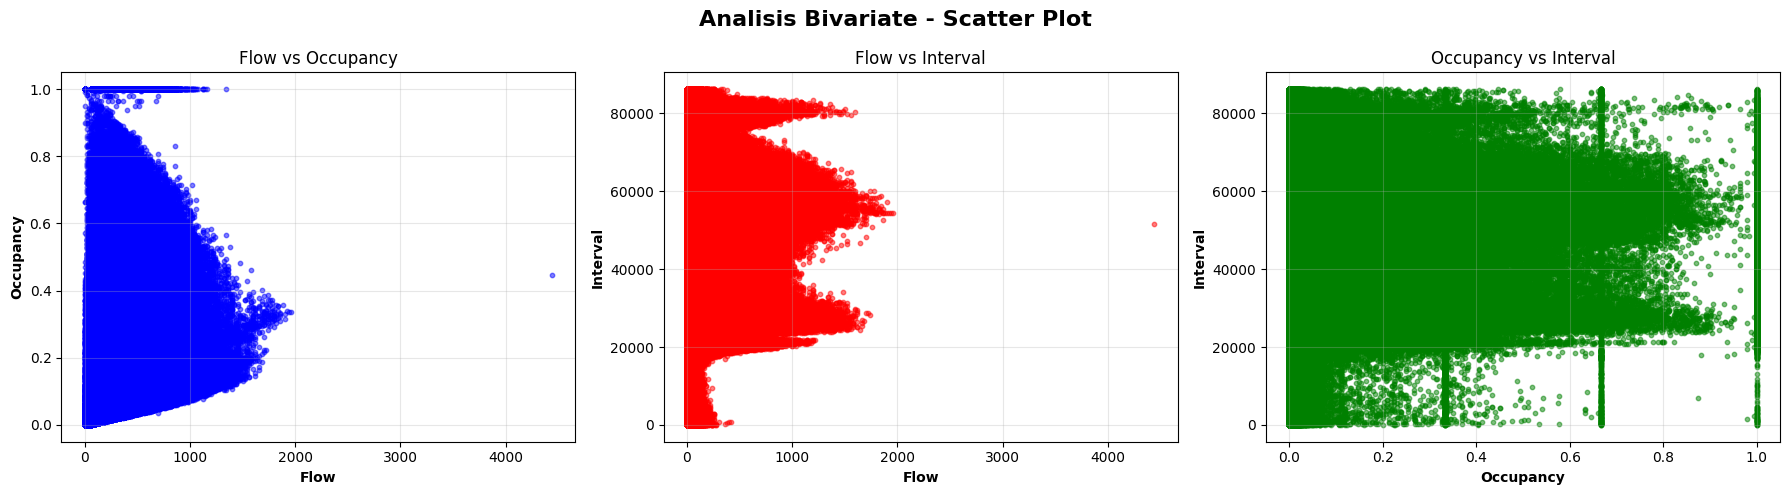

In [33]:
# Scatter plot untuk hubungan antar variabel numerik
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Analisis Bivariate - Scatter Plot', fontsize=16, fontweight='bold')

# Flow vs Occupancy
axes[0].scatter(df['flow'], df['occ'], alpha=0.5, c='blue', s=10)
axes[0].set_xlabel('Flow', fontweight='bold')
axes[0].set_ylabel('Occupancy', fontweight='bold')
axes[0].set_title('Flow vs Occupancy')
axes[0].grid(True, alpha=0.3)

# Flow vs Interval
axes[1].scatter(df['flow'], df['interval'], alpha=0.5, c='red', s=10)
axes[1].set_xlabel('Flow', fontweight='bold')
axes[1].set_ylabel('Interval', fontweight='bold')
axes[1].set_title('Flow vs Interval')
axes[1].grid(True, alpha=0.3)

# Occupancy vs Interval
axes[2].scatter(df['occ'], df['interval'], alpha=0.5, c='green', s=10)
axes[2].set_xlabel('Occupancy', fontweight='bold')
axes[2].set_ylabel('Interval', fontweight='bold')
axes[2].set_title('Occupancy vs Interval')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

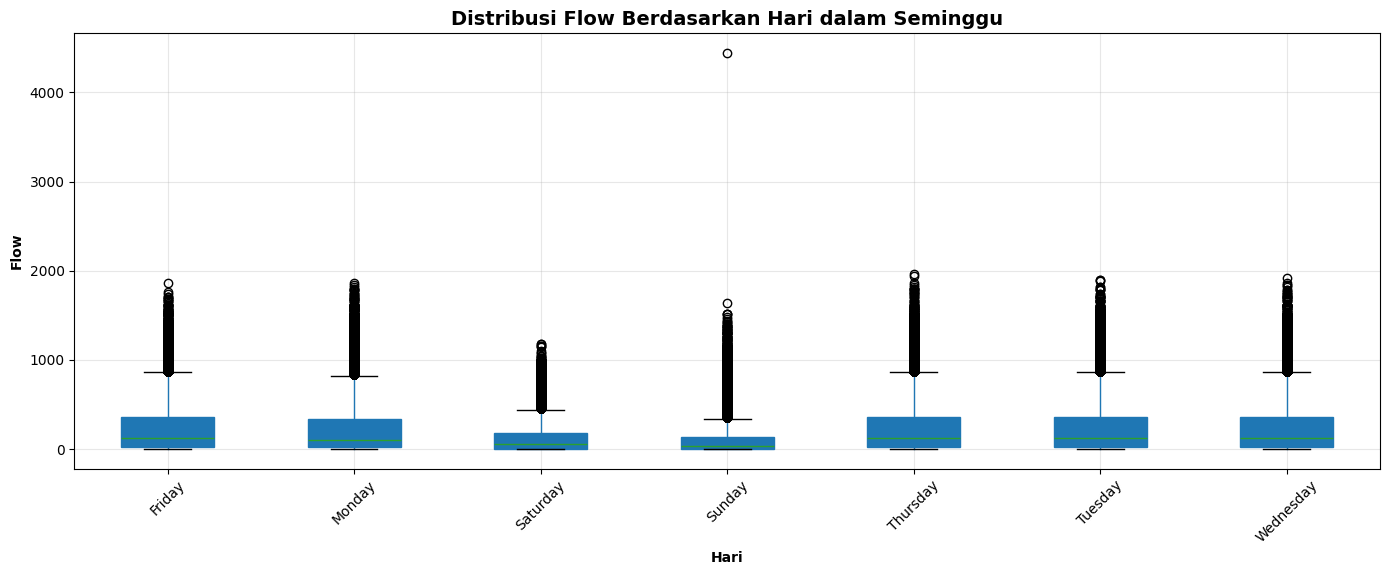

In [34]:
# Box plot untuk flow berdasarkan hari dalam seminggu
plt.figure(figsize=(14, 6))
df.boxplot(column='flow', by='day_of_week', figsize=(14, 6), patch_artist=True)
plt.suptitle('')
plt.title('Distribusi Flow Berdasarkan Hari dalam Seminggu', fontsize=14, fontweight='bold')
plt.xlabel('Hari', fontweight='bold')
plt.ylabel('Flow', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\nakir\AppData\Local\Temp\ipykernel_6528\618815766.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_sample_sorted, x='day_of_week', y='flow', ax=axes[0],
C:\Users\nakir\AppData\Local\Temp\ipykernel_6528\618815766.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_sample_sorted, x='day_of_week', y='occ', ax=axes[1],
C:\Users\nakir\AppData\Local\Temp\ipykernel_6528\618815766.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_sample_sorted, x='day_of_week', y='occ', ax=axes[1],


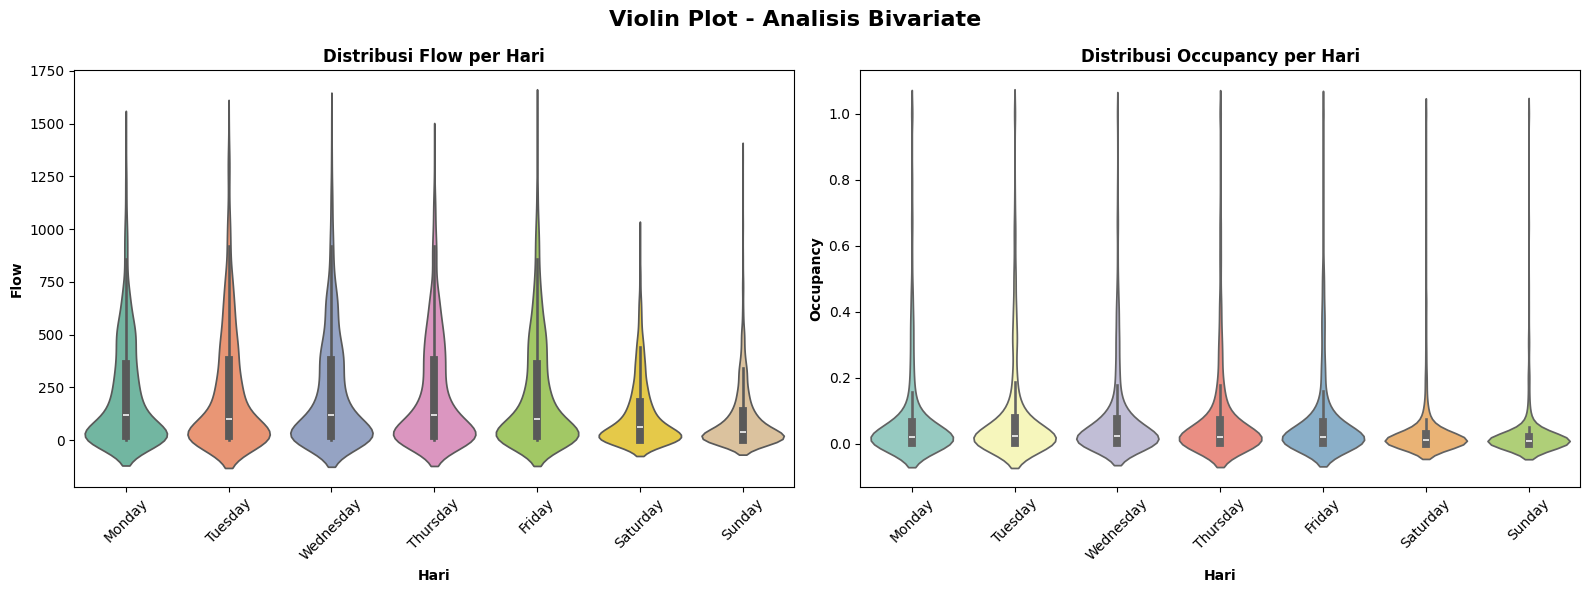

In [35]:
# Violin plot untuk distribusi flow dan occupancy
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Violin Plot - Analisis Bivariate', fontsize=16, fontweight='bold')

# Sampel data untuk visualisasi yang lebih baik (karena dataset sangat besar)
df_sample = df.sample(n=min(10000, len(df)), random_state=42)

# Violin plot Flow by Day of Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_sample_sorted = df_sample[df_sample['day_of_week'].isin(day_order)]

sns.violinplot(data=df_sample_sorted, x='day_of_week', y='flow', ax=axes[0], 
               order=day_order, palette='Set2')
axes[0].set_title('Distribusi Flow per Hari', fontweight='bold')
axes[0].set_xlabel('Hari', fontweight='bold')
axes[0].set_ylabel('Flow', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Violin plot Occupancy by Day of Week
sns.violinplot(data=df_sample_sorted, x='day_of_week', y='occ', ax=axes[1], 
               order=day_order, palette='Set3')
axes[1].set_title('Distribusi Occupancy per Hari', fontweight='bold')
axes[1].set_xlabel('Hari', fontweight='bold')
axes[1].set_ylabel('Occupancy', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 4. Analisis Multivariate

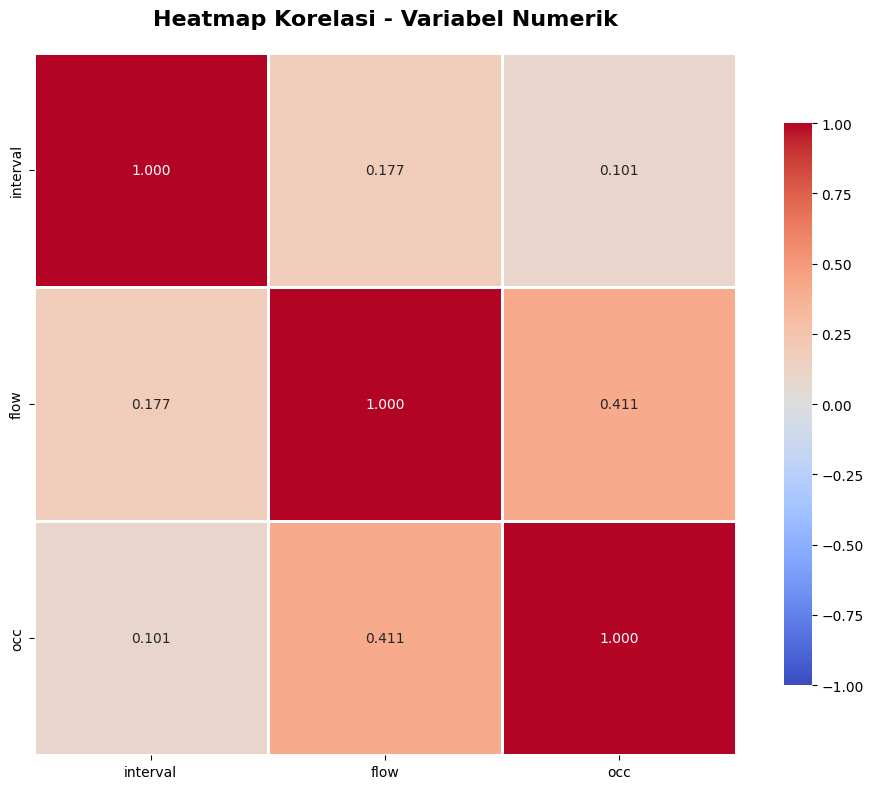


Matriks Korelasi:
          interval      flow       occ
interval  1.000000  0.176588  0.101037
flow      0.176588  1.000000  0.410699
occ       0.101037  0.410699  1.000000


In [36]:
# Heatmap Korelasi untuk variabel numerik
plt.figure(figsize=(10, 8))

# Hitung korelasi
correlation_matrix = df[numeric_cols].corr()

# Buat heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.3f', vmin=-1, vmax=1)

plt.title('Heatmap Korelasi - Variabel Numerik', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Tampilkan korelasi dalam bentuk tabel
print("\nMatriks Korelasi:")
print(correlation_matrix)

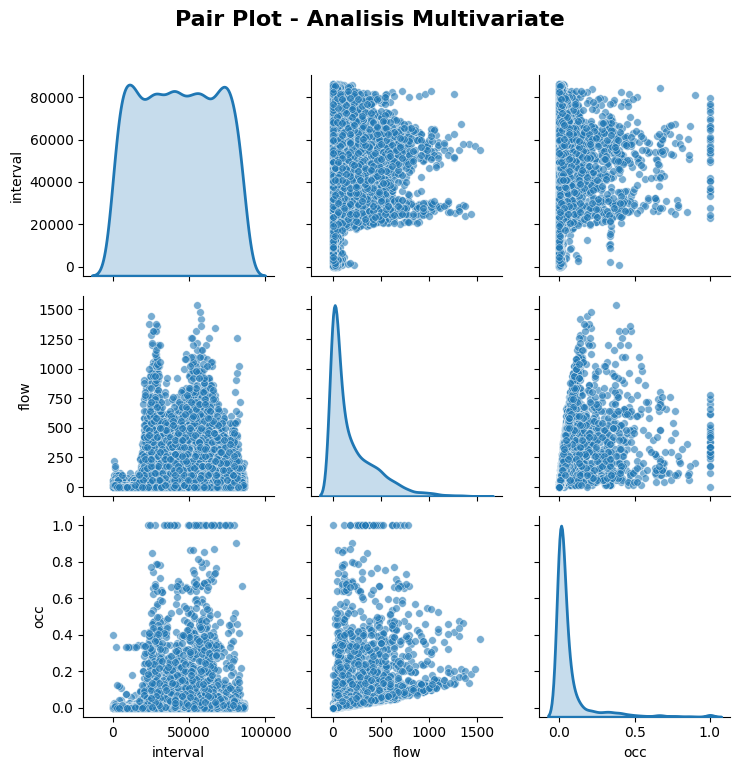

In [37]:
# Pair plot untuk melihat hubungan semua variabel numerik
# Menggunakan sample untuk performa yang lebih baik
df_sample = df[numeric_cols].sample(n=min(5000, len(df)), random_state=42)

pairplot = sns.pairplot(df_sample, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30}, 
                        diag_kws={'linewidth': 2})
pairplot.fig.suptitle('Pair Plot - Analisis Multivariate', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Analisis Time Series

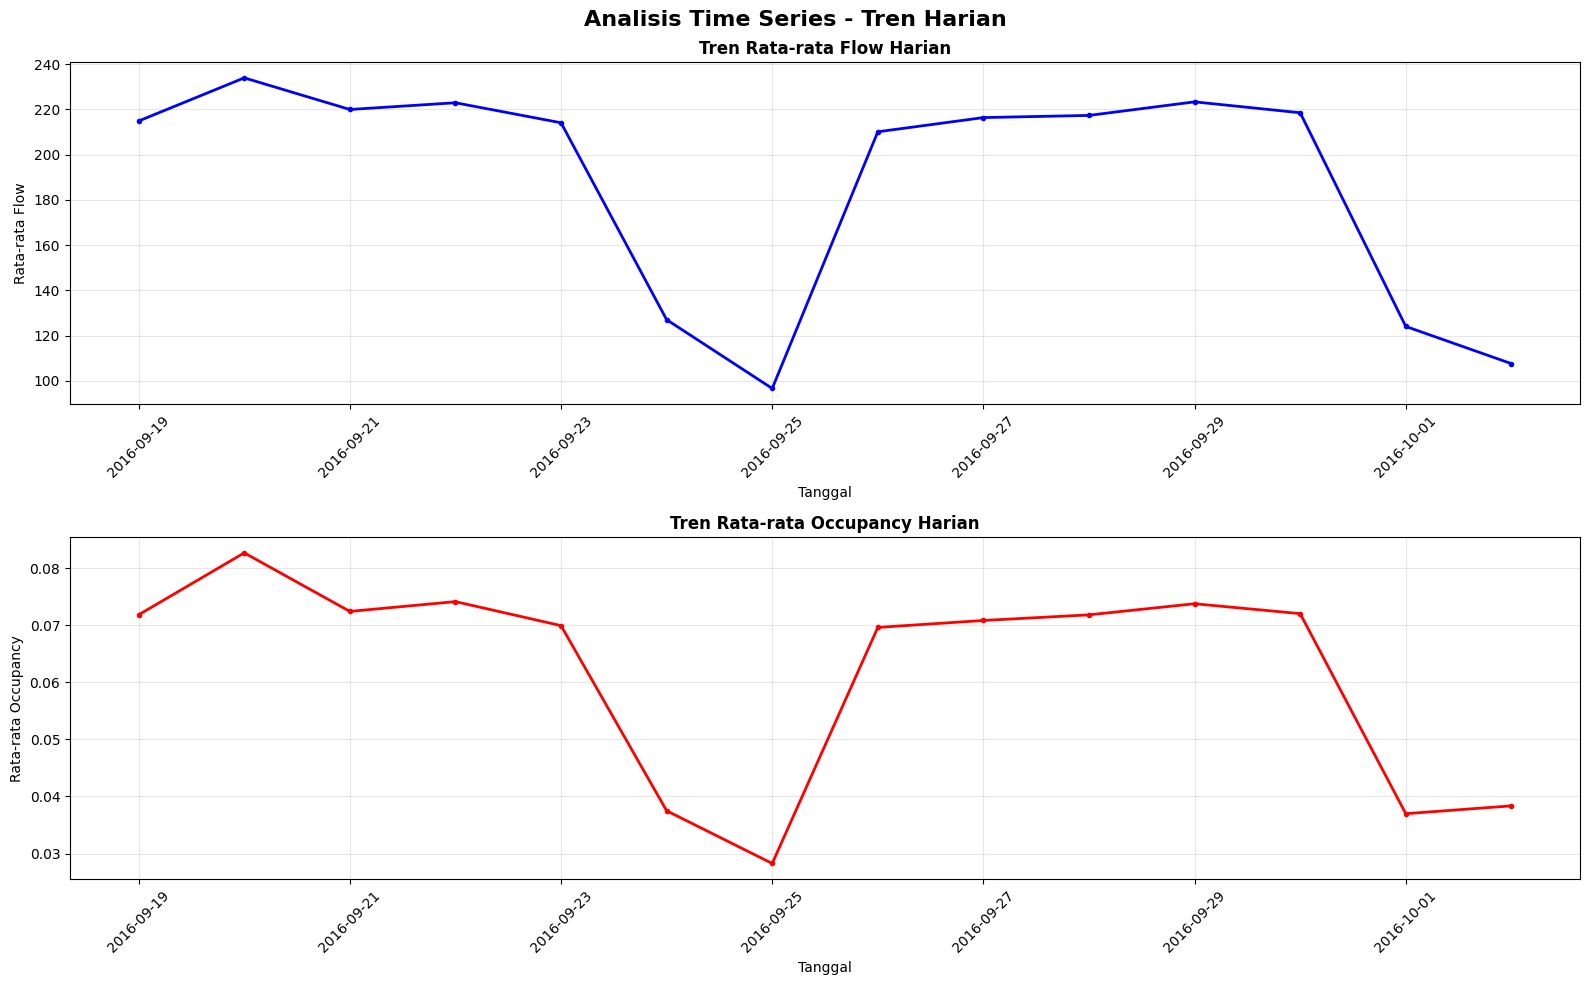

In [41]:
# Analisis tren flow dan occupancy berdasarkan waktu
# Agregasi data per hari
daily_stats = df.groupby('day')[['flow', 'occ']].mean().reset_index()
daily_stats['day'] = pd.to_datetime(daily_stats['day'])
daily_stats = daily_stats.sort_values('day')

fig, axes = plt.subplots(2, 1, figsize=(16, 10))
fig.suptitle('Analisis Time Series - Tren Harian', fontsize=16, fontweight='bold')

# Plot Flow
axes[0].plot(daily_stats['day'], daily_stats['flow'], color='blue', linewidth=2, marker='o', markersize=3)
axes[0].set_title('Tren Rata-rata Flow Harian', fontweight='bold')
axes[0].set_xlabel('Tanggal')
axes[0].set_ylabel('Rata-rata Flow')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Plot Occupancy
axes[1].plot(daily_stats['day'], daily_stats['occ'], color='red', linewidth=2, marker='o', markersize=3)
axes[1].set_title('Tren Rata-rata Occupancy Harian', fontweight='bold')
axes[1].set_xlabel('Tanggal')
axes[1].set_ylabel('Rata-rata Occupancy')
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

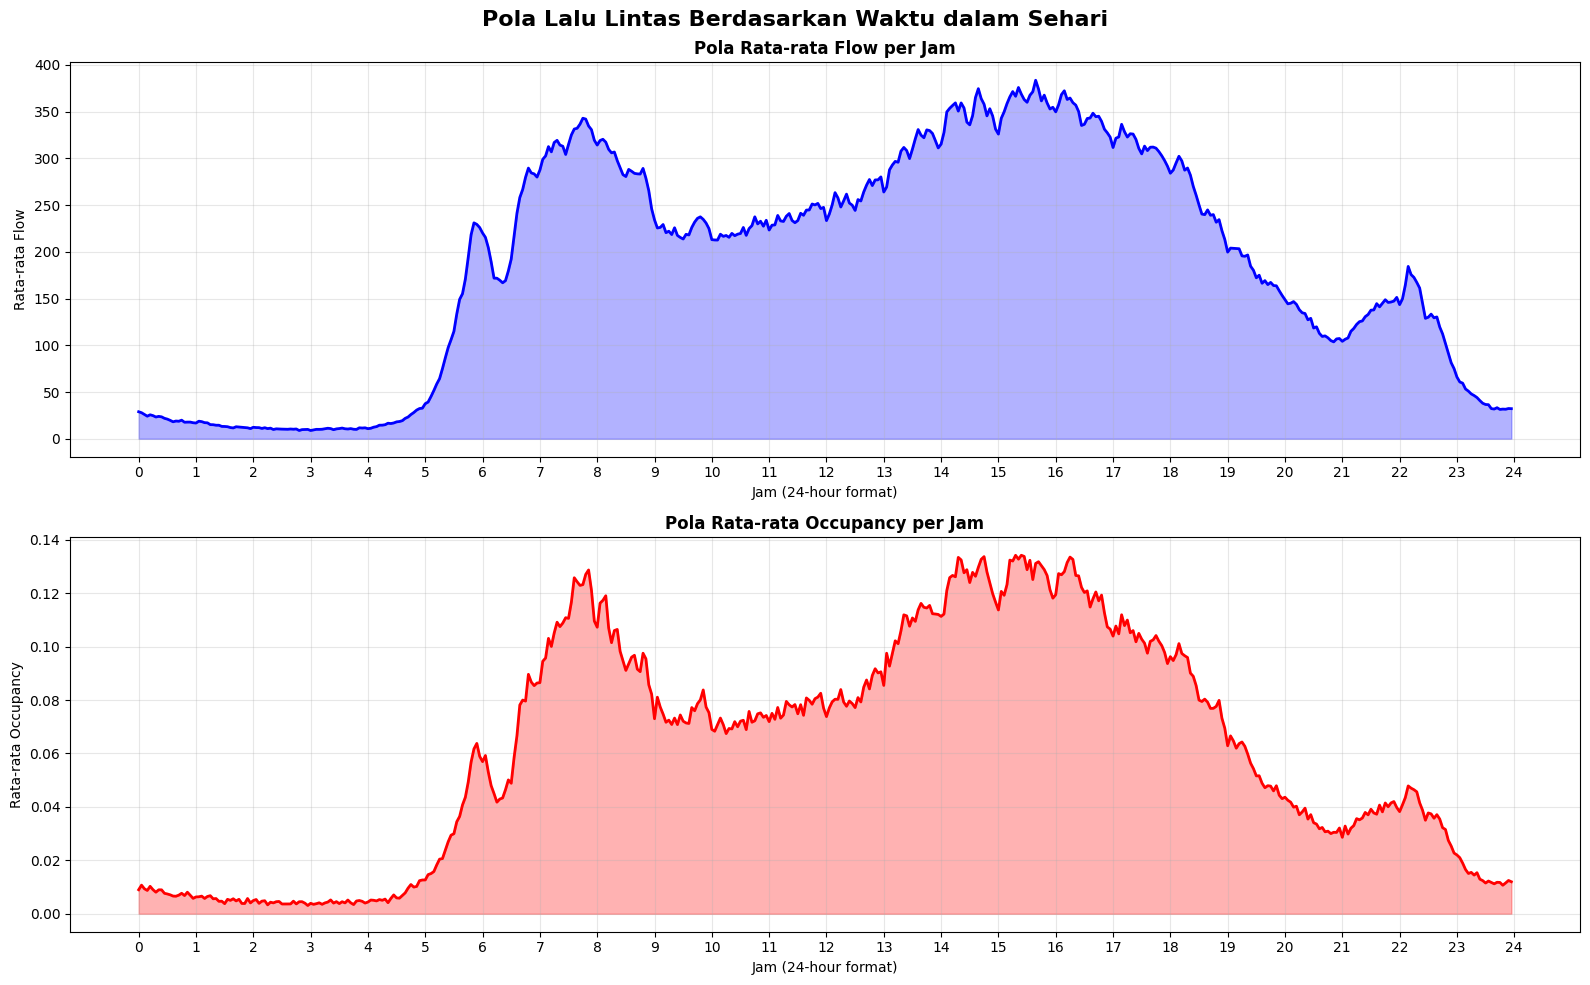


ANALISIS POLA WAKTU

Jam tersibuk (Flow tertinggi): 15:00
Flow tertinggi: 383.48

Jam tersepi (Flow terendah): 2:00
Flow terendah: 8.88


In [48]:
# Analisis pola berdasarkan waktu dalam sehari (interval)
hourly_pattern = df.groupby('interval')[['flow', 'occ']].mean().reset_index()
hourly_pattern['hour'] = hourly_pattern['interval'] / 3600  # Konversi detik ke jam

fig, axes = plt.subplots(2, 1, figsize=(16, 10))
fig.suptitle('Pola Lalu Lintas Berdasarkan Waktu dalam Sehari', fontsize=16, fontweight='bold')

# Flow pattern
axes[0].plot(hourly_pattern['hour'], hourly_pattern['flow'], color='blue', linewidth=2)
axes[0].fill_between(hourly_pattern['hour'], hourly_pattern['flow'], alpha=0.3, color='blue')
axes[0].set_title('Pola Rata-rata Flow per Jam', fontweight='bold')
axes[0].set_xlabel('Jam (24-hour format)')
axes[0].set_ylabel('Rata-rata Flow')
axes[0].set_xticks(range(0, 25, 1))
axes[0].grid(True, alpha=0.3)

# Occupancy pattern
axes[1].plot(hourly_pattern['hour'], hourly_pattern['occ'], color='red', linewidth=2)
axes[1].fill_between(hourly_pattern['hour'], hourly_pattern['occ'], alpha=0.3, color='red')
axes[1].set_title('Pola Rata-rata Occupancy per Jam', fontweight='bold')
axes[1].set_xlabel('Jam (24-hour format)')
axes[1].set_ylabel('Rata-rata Occupancy')
axes[1].set_xticks(range(0, 25, 1))
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identifikasi jam tersibuk
print("\n" + "=" * 70)
print("ANALISIS POLA WAKTU")
print("=" * 70)
print(f"\nJam tersibuk (Flow tertinggi): {int(hourly_pattern.loc[hourly_pattern['flow'].idxmax(), 'hour'])}:00")
print(f"Flow tertinggi: {hourly_pattern['flow'].max():.2f}")
print(f"\nJam tersepi (Flow terendah): {int(hourly_pattern.loc[hourly_pattern['flow'].idxmin(), 'hour'])}:00")
print(f"Flow terendah: {hourly_pattern['flow'].min():.2f}")

## 7. Kesimpulan Analisis EDA

In [43]:
# Ringkasan Statistik Lengkap
print("=" * 80)
print("RINGKASAN EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 80)

print("\n1. INFORMASI DATASET:")
print(f"   - Total baris: {len(df):,}")
print(f"   - Total kolom: {len(df.columns)}")
print(f"   - Kolom numerik: {len(numeric_cols)}")
print(f"   - Kolom kategorikal: {len(categorical_cols)}")
print(f"   - Missing values: {df.isnull().sum().sum()}")
print(f"   - Duplicate rows: {df.duplicated().sum()}")

print("\n2. STATISTIK VARIABEL NUMERIK:")
for col in numeric_cols:
    print(f"\n   {col.upper()}:")
    print(f"   - Mean: {df[col].mean():.4f}")
    print(f"   - Median: {df[col].median():.4f}")
    print(f"   - Std Dev: {df[col].std():.4f}")
    print(f"   - Min: {df[col].min():.4f}")
    print(f"   - Max: {df[col].max():.4f}")

print("\n3. KORELASI ANTAR VARIABEL:")
corr_matrix = df[numeric_cols].corr()
print("\n   Korelasi tertinggi:")
# Ambil korelasi tertinggi (selain diagonal)
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append({
            'var1': corr_matrix.columns[i],
            'var2': corr_matrix.columns[j],
            'correlation': corr_matrix.iloc[i, j]
        })
corr_pairs_sorted = sorted(corr_pairs, key=lambda x: abs(x['correlation']), reverse=True)
for pair in corr_pairs_sorted[:3]:
    print(f"   - {pair['var1']} vs {pair['var2']}: {pair['correlation']:.4f}")

print("\n4. DISTRIBUSI KATEGORIKAL:")
print(f"\n   Jumlah Detector ID unik: {df['detid'].nunique()}")
print(f"   Detector ID paling aktif: {df['detid'].value_counts().index[0]}")
print(f"   Jumlah hari unik: {df['day'].nunique()}")

print("\n5. INSIGHT WAKTU:")
if 'day_of_week' in df.columns:
    busiest_day = df.groupby('day_of_week')['flow'].mean().sort_values(ascending=False).index[0]
    print(f"   - Hari tersibuk: {busiest_day}")
    print(f"   - Rata-rata flow per hari: {df.groupby('day_of_week')['flow'].mean().mean():.2f}")

print("\n" + "=" * 80)

RINGKASAN EXPLORATORY DATA ANALYSIS (EDA)

1. INFORMASI DATASET:
   - Total baris: 893,671
   - Total kolom: 9
   - Kolom numerik: 3
   - Kolom kategorikal: 4
   - Missing values: 214767
   - Missing values: 214767
   - Duplicate rows: 0

2. STATISTIK VARIABEL NUMERIK:

   INTERVAL:
   - Mean: 43109.8210
   - Median: 43020.0000
   - Std Dev: 24942.6517
   - Min: 0.0000
   - Max: 86220.0000

   FLOW:
   - Mean: 189.0201
   - Median: 80.0000
   - Std Dev: 240.2244
   - Min: 0.0000
   - Max: 4440.0000

   OCC:
   - Mean: 0.0622
   - Median: 0.0137
   - Std Dev: 0.1328
   - Min: 0.0000
   - Max: 1.0000

3. KORELASI ANTAR VARIABEL:

   Korelasi tertinggi:
   - flow vs occ: 0.4107
   - interval vs flow: 0.1766
   - interval vs occ: 0.1010

4. DISTRIBUSI KATEGORIKAL:
   - Duplicate rows: 0

2. STATISTIK VARIABEL NUMERIK:

   INTERVAL:
   - Mean: 43109.8210
   - Median: 43020.0000
   - Std Dev: 24942.6517
   - Min: 0.0000
   - Max: 86220.0000

   FLOW:
   - Mean: 189.0201
   - Median: 80.0000


## 8. Pengecekan Kesiapan Data untuk Machine Learning

In [56]:
# CEK KESIAPAN DATA UNTUK MACHINE LEARNING
print("=" * 80)
print("PENGECEKAN KESIAPAN DATA UNTUK MACHINE LEARNING")
print("=" * 80)

# 1. Cek Missing Values
print("\n1. MISSING VALUES:")
missing_count = df.isnull().sum()
print(f"   Total missing values: {missing_count.sum()}")
if missing_count.sum() == 0:
    print("   ✓ BAIK: Tidak ada missing values")
else:
    print("   ✗ PERLU DITANGANI:")
    for col in missing_count[missing_count > 0].index:
        print(f"     - {col}: {missing_count[col]} ({(missing_count[col]/len(df)*100):.2f}%)")

# 2. Cek Duplicate Data
print("\n2. DUPLICATE DATA:")
duplicates = df.duplicated().sum()
print(f"   Total duplicate rows: {duplicates}")
if duplicates == 0:
    print("   ✓ BAIK: Tidak ada data duplikat")
else:
    print(f"   ⚠ PERHATIAN: Ada {duplicates} baris duplikat ({(duplicates/len(df)*100):.2f}%)")

# 3. Cek Tipe Data
print("\n3. TIPE DATA:")
print("   Kolom dan tipe datanya:")
for col in df.columns:
    print(f"     - {col}: {df[col].dtype}")

# 4. Cek Variabel Numerik
print("\n4. VARIABEL NUMERIK:")
print(f"   Jumlah kolom numerik: {len(numeric_cols)}")
print(f"   Kolom: {numeric_cols}")
if len(numeric_cols) > 0:
    print("   ✓ BAIK: Ada variabel numerik untuk modeling")
else:
    print("   ✗ MASALAH: Tidak ada variabel numerik")

# 5. Cek Variabel Kategorikal
print("\n5. VARIABEL KATEGORIKAL:")
print(f"   Jumlah kolom kategorikal: {len(categorical_cols)}")
print(f"   Kolom: {categorical_cols}")
if len(categorical_cols) > 0:
    print("   ⚠ PERLU ENCODING: Variabel kategorikal perlu di-encode")
    for col in categorical_cols:
        unique_count = df[col].nunique()
        print(f"     - {col}: {unique_count} nilai unik")

# 6. Cek Outliers
print("\n6. OUTLIERS:")
has_outliers = False
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    pct = (len(outliers) / len(df)) * 100
    if pct > 0:
        has_outliers = True
        print(f"   - {col}: {len(outliers)} outliers ({pct:.2f}%)")

if has_outliers:
    print("   ⚠ PERLU DIPERTIMBANGKAN: Ada outliers (bisa di-handle atau dibiarkan tergantung konteks)")
else:
    print("   ✓ BAIK: Tidak ada outliers signifikan")

# 7. Cek Data Balance (untuk variabel target potensial)
print("\n7. DISTRIBUSI DATA:")
print(f"   Total records: {len(df):,}")
print(f"   Shape: {df.shape}")

# 8. Ringkasan Kesiapan
print("\n" + "=" * 80)
print("RINGKASAN KESIAPAN DATA:")
print("=" * 80)

ready_score = 0
total_checks = 6

# Check 1: No missing values
if missing_count.sum() == 0:
    print("✓ Tidak ada missing values")
    ready_score += 1
else:
    print("✗ Ada missing values yang perlu ditangani")

# Check 2: No duplicates (or minimal)
if duplicates == 0:
    print("✓ Tidak ada data duplikat")
    ready_score += 1
else:
    print("⚠ Ada data duplikat (opsional untuk dihapus)")
    ready_score += 0.5

# Check 3: Has numeric variables
if len(numeric_cols) > 0:
    print("✓ Ada variabel numerik")
    ready_score += 1
else:
    print("✗ Tidak ada variabel numerik")

# Check 4: Categorical variables need encoding
if len(categorical_cols) > 0:
    print("⚠ Variabel kategorikal perlu encoding (Label/One-Hot)")
    ready_score += 0.5
else:
    print("✓ Tidak ada variabel kategorikal yang perlu encoding")
    ready_score += 1

# Check 5: Data size is adequate
if len(df) >= 1000:
    print("✓ Jumlah data mencukupi untuk training")
    ready_score += 1
else:
    print("⚠ Jumlah data terbatas")
    ready_score += 0.5

# Check 6: Data types are appropriate
if all(df[col].dtype in ['int64', 'float64'] for col in numeric_cols):
    print("✓ Tipe data numerik sudah sesuai")
    ready_score += 1
else:
    print("⚠ Ada tipe data yang perlu dikonversi")
    ready_score += 0.5

print("\n" + "-" * 80)
print(f"SKOR KESIAPAN: {ready_score}/{total_checks} ({(ready_score/total_checks)*100:.1f}%)")
print("-" * 80)

if ready_score >= 5:
    print("\n✓✓✓ DATA SIAP UNTUK MACHINE LEARNING!")
    print("Rekomendasi: Lakukan encoding untuk variabel kategorikal sebelum modeling")
elif ready_score >= 4:
    print("\n⚠⚠ DATA HAMPIR SIAP")
    print("Perlu beberapa preprocessing sebelum modeling")
else:
    print("\n✗✗ DATA PERLU CLEANING LEBIH LANJUT")
    print("Tangani masalah di atas sebelum modeling")

print("\n" + "=" * 80)

PENGECEKAN KESIAPAN DATA UNTUK MACHINE LEARNING

1. MISSING VALUES:
   Total missing values: 214767
   ✗ PERLU DITANGANI:
     - occ: 24 (0.00%)
     - flow_category: 214743 (24.03%)

2. DUPLICATE DATA:
   Total duplicate rows: 0
   ✓ BAIK: Tidak ada data duplikat

3. TIPE DATA:
   Kolom dan tipe datanya:
     - day: datetime64[ns]
     - interval: int64
     - detid: object
     - flow: float64
     - occ: float64
     - city: object
     - flow_category: category
     - day_parsed: datetime64[ns]
     - day_of_week: object

4. VARIABEL NUMERIK:
   Jumlah kolom numerik: 3
   Kolom: ['interval', 'flow', 'occ']
   ✓ BAIK: Ada variabel numerik untuk modeling

5. VARIABEL KATEGORIKAL:
   Jumlah kolom kategorikal: 4
   Kolom: ['day', 'detid', 'city', 'flow_category']
   ⚠ PERLU ENCODING: Variabel kategorikal perlu di-encode
     - day: 14 nilai unik
     - detid: 133 nilai unik
     - city: 1 nilai unik
     - flow_category: 4 nilai unik

6. OUTLIERS:
   - flow: 37183 outliers (4.16%)
   -

### Rekomendasi Preprocessing untuk Machine Learning:

In [58]:
print("=" * 80)
print("LANGKAH-LANGKAH PREPROCESSING YANG DIREKOMENDASIKAN")
print("=" * 80)

print("\n1. ENCODING VARIABEL KATEGORIKAL:")
print("   Variabel yang perlu di-encode:")
for col in categorical_cols:
    unique_count = df[col].nunique()
    if unique_count <= 10:
        print(f"   • {col} → One-Hot Encoding (nilai unik: {unique_count})")
    else:
        print(f"   • {col} → Label Encoding atau Target Encoding (nilai unik: {unique_count})")

print("\n2. FEATURE ENGINEERING:")
print("   Fitur tambahan yang bisa dibuat:")
print("   • Ekstrak jam, hari, bulan dari kolom 'day'")
print("   • Buat fitur 'is_weekend' dari day_of_week")
print("   • Buat fitur 'time_of_day' dari interval (pagi/siang/sore/malam)")
print("   • Agregasi statistik (rolling average, lag features) untuk time series")

print("\n3. SCALING/NORMALIZATION:")
print("   Untuk algoritma yang sensitif terhadap skala (SVM, KNN, Neural Networks):")
print("   • StandardScaler: untuk distribusi normal")
print("   • MinMaxScaler: untuk membatasi range [0,1]")
print("   • RobustScaler: jika ada outliers")

print("\n4. HANDLING OUTLIERS (Opsional):")
if has_outliers:
    print("   • Opsi 1: Biarkan (jika outliers valid)")
    print("   • Opsi 2: Clipping (batasi pada threshold tertentu)")
    print("   • Opsi 3: Transformation (log, sqrt)")
    print("   • Opsi 4: Remove (hanya jika outliers adalah error)")
else:
    print("   ✓ Tidak perlu handling outliers")

print("\n5. SPLIT DATA:")
print("   • Training set: 70-80%")
print("   • Validation set: 10-15% (untuk hyperparameter tuning)")
print("   • Test set: 10-15% (untuk evaluasi akhir)")
print("   • Untuk time series: gunakan time-based split (temporal order)")

print("\n6. FEATURE SELECTION (Opsional):")
print("   • Gunakan correlation matrix untuk identifikasi fitur redundan")
print("   • Feature importance dari model tree-based")
print("   • Recursive Feature Elimination (RFE)")

print("\n" + "=" * 80)
print("CONTOH KODE PREPROCESSING:")
print("=" * 80)

print("""
# 1. Encoding Kategorikal
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding untuk kolom dengan banyak nilai unik
le = LabelEncoder()
df['detid_encoded'] = le.fit_transform(df['detid'])

# One-Hot Encoding untuk day_of_week
df_encoded = pd.get_dummies(df, columns=['day_of_week'], prefix='day')

# 2. Feature Engineering
df['hour'] = df['interval'] / 3600
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

# 3. Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_to_scale = ['flow', 'occ', 'interval']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# 4. Train-Test Split
from sklearn.model_selection import train_test_split

X = df[['interval', 'occ', 'detid_encoded', 'hour', 'is_weekend']]
y = df['flow']  # atau target variable lainnya

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
""")

LANGKAH-LANGKAH PREPROCESSING YANG DIREKOMENDASIKAN

1. ENCODING VARIABEL KATEGORIKAL:
   Variabel yang perlu di-encode:
   • day → Label Encoding atau Target Encoding (nilai unik: 14)
   • detid → Label Encoding atau Target Encoding (nilai unik: 133)
   • city → One-Hot Encoding (nilai unik: 1)
   • flow_category → One-Hot Encoding (nilai unik: 4)

2. FEATURE ENGINEERING:
   Fitur tambahan yang bisa dibuat:
   • Ekstrak jam, hari, bulan dari kolom 'day'
   • Buat fitur 'is_weekend' dari day_of_week
   • Buat fitur 'time_of_day' dari interval (pagi/siang/sore/malam)
   • Agregasi statistik (rolling average, lag features) untuk time series

3. SCALING/NORMALIZATION:
   Untuk algoritma yang sensitif terhadap skala (SVM, KNN, Neural Networks):
   • StandardScaler: untuk distribusi normal
   • MinMaxScaler: untuk membatasi range [0,1]
   • RobustScaler: jika ada outliers

4. HANDLING OUTLIERS (Opsional):
   • Opsi 1: Biarkan (jika outliers valid)
   • Opsi 2: Clipping (batasi pada threshol

## 9. Preprocessing Data untuk Machine Learning

In [59]:
# Buat copy dataframe untuk preprocessing
df_ml = df.copy()

print("=" * 80)
print("PREPROCESSING DATA - TAHAP 1: FEATURE ENGINEERING")
print("=" * 80)

# 1. Ekstrak fitur waktu dari kolom day
df_ml['year'] = df_ml['day_parsed'].dt.year
df_ml['month'] = df_ml['day_parsed'].dt.month
df_ml['day_of_month'] = df_ml['day_parsed'].dt.day
df_ml['week_of_year'] = df_ml['day_parsed'].dt.isocalendar().week

# 2. Konversi interval (detik) ke jam
df_ml['hour'] = df_ml['interval'] / 3600

# 3. Buat kategori waktu dalam sehari
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 17:
        return 'Siang'
    elif 17 <= hour < 21:
        return 'Sore'
    else:
        return 'Malam'

df_ml['time_of_day'] = df_ml['hour'].apply(categorize_time_of_day)

# 4. Buat fitur is_weekend
df_ml['is_weekend'] = df_ml['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

# 5. Buat fitur is_peak_hour (jam sibuk: 7-9 dan 17-19)
df_ml['is_peak_hour'] = ((df_ml['hour'] >= 7) & (df_ml['hour'] < 9) | 
                          (df_ml['hour'] >= 17) & (df_ml['hour'] < 19)).astype(int)

print("\n✓ Feature Engineering selesai!")
print(f"Fitur baru yang ditambahkan:")
print(f"  - year, month, day_of_month, week_of_year")
print(f"  - hour (dari interval)")
print(f"  - time_of_day (Pagi/Siang/Sore/Malam)")
print(f"  - is_weekend (0/1)")
print(f"  - is_peak_hour (0/1)")
print(f"\nTotal kolom sekarang: {len(df_ml.columns)}")
print(f"Shape: {df_ml.shape}")

PREPROCESSING DATA - TAHAP 1: FEATURE ENGINEERING

✓ Feature Engineering selesai!
Fitur baru yang ditambahkan:
  - year, month, day_of_month, week_of_year
  - hour (dari interval)
  - time_of_day (Pagi/Siang/Sore/Malam)
  - is_weekend (0/1)
  - is_peak_hour (0/1)

Total kolom sekarang: 17
Shape: (893671, 17)


In [60]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

print("\n" + "=" * 80)
print("PREPROCESSING DATA - TAHAP 2: ENCODING VARIABEL KATEGORIKAL")
print("=" * 80)

# 1. Label Encoding untuk kolom dengan banyak nilai unik (detid, city)
le_detid = LabelEncoder()
df_ml['detid_encoded'] = le_detid.fit_transform(df_ml['detid'])

le_city = LabelEncoder()
df_ml['city_encoded'] = le_city.fit_transform(df_ml['city'])

print("\n✓ Label Encoding selesai:")
print(f"  - detid → detid_encoded ({df_ml['detid'].nunique()} kategori)")
print(f"  - city → city_encoded ({df_ml['city'].nunique()} kategori)")

# 2. One-Hot Encoding untuk day_of_week
df_ml = pd.get_dummies(df_ml, columns=['day_of_week'], prefix='day')

print(f"\n✓ One-Hot Encoding selesai:")
print(f"  - day_of_week → 7 kolom biner (day_Monday, day_Tuesday, ...)")

# 3. One-Hot Encoding untuk time_of_day
df_ml = pd.get_dummies(df_ml, columns=['time_of_day'], prefix='time')

print(f"\n✓ One-Hot Encoding selesai:")
print(f"  - time_of_day → 4 kolom biner (time_Pagi, time_Siang, time_Sore, time_Malam)")

# 4. Hapus kolom kategorikal asli yang tidak diperlukan
columns_to_drop = ['detid', 'city', 'day', 'day_parsed', 'flow_category']
df_ml = df_ml.drop(columns=[col for col in columns_to_drop if col in df_ml.columns], errors='ignore')

print(f"\n✓ Kolom kategorikal asli dihapus")
print(f"Total kolom sekarang: {len(df_ml.columns)}")
print(f"Shape: {df_ml.shape}")


PREPROCESSING DATA - TAHAP 2: ENCODING VARIABEL KATEGORIKAL

✓ Label Encoding selesai:
  - detid → detid_encoded (133 kategori)
  - city → city_encoded (1 kategori)

✓ One-Hot Encoding selesai:
  - day_of_week → 7 kolom biner (day_Monday, day_Tuesday, ...)

✓ One-Hot Encoding selesai:
  - time_of_day → 4 kolom biner (time_Pagi, time_Siang, time_Sore, time_Malam)

✓ Kolom kategorikal asli dihapus
Total kolom sekarang: 23
Shape: (893671, 23)


In [61]:
print("\n" + "=" * 80)
print("PREPROCESSING DATA - TAHAP 3: SCALING/NORMALIZATION")
print("=" * 80)

# Identifikasi kolom numerik yang perlu di-scale
numerical_features = ['flow', 'interval', 'occ', 'hour', 'year', 'month', 
                      'day_of_month', 'week_of_year']

# Pastikan semua kolom ada di dataframe
numerical_features = [col for col in numerical_features if col in df_ml.columns]

print(f"\nKolom numerik yang akan di-scale:")
for col in numerical_features:
    print(f"  - {col}")

# Simpan nilai asli untuk referensi (optional)
df_ml_original = df_ml[numerical_features].copy()

# Lakukan StandardScaler (Z-score normalization)
scaler = StandardScaler()
df_ml[numerical_features] = scaler.fit_transform(df_ml[numerical_features])

print(f"\n✓ Scaling selesai menggunakan StandardScaler!")
print(f"\nStatistik setelah scaling:")
print(df_ml[numerical_features].describe().round(4))

print(f"\n{'='*80}")
print("VERIFIKASI: Mean ≈ 0 dan Std ≈ 1 untuk semua fitur numerik")
print(f"{'='*80}")


PREPROCESSING DATA - TAHAP 3: SCALING/NORMALIZATION

Kolom numerik yang akan di-scale:
  - flow
  - interval
  - occ
  - hour
  - year
  - month
  - day_of_month
  - week_of_year

✓ Scaling selesai menggunakan StandardScaler!

Statistik setelah scaling:
              flow     interval          occ         hour      year  \
count  893671.0000  893671.0000  893647.0000  893671.0000  893671.0   
mean       -0.0000       0.0000      -0.0000      -0.0000       0.0   
std         1.0000       1.0000       1.0000       1.0000       0.0   
min        -0.7868      -1.7284      -0.4680      -1.7284       0.0   
25%        -0.7036      -0.8696      -0.4563      -0.8696       0.0   
50%        -0.4538      -0.0036      -0.3652      -0.0036       0.0   
75%         0.4620       0.8696      -0.0665       0.8696       0.0   
max        17.6959       1.7284       7.0607       1.7284       0.0   

             month  day_of_month  week_of_year  
count  893671.0000   893671.0000   893671.0000  
mean   

In [62]:
print("\n" + "=" * 80)
print("RINGKASAN DATA SETELAH PREPROCESSING")
print("=" * 80)

print(f"\n1. DIMENSI DATA:")
print(f"   - Total rows: {df_ml.shape[0]:,}")
print(f"   - Total columns: {df_ml.shape[1]}")

print(f"\n2. TIPE KOLOM:")
numeric_count = df_ml.select_dtypes(include=[np.number]).shape[1]
print(f"   - Numerik: {numeric_count}")
print(f"   - Kategorikal: {df_ml.select_dtypes(include=['object']).shape[1]}")

print(f"\n3. MISSING VALUES:")
print(f"   - Total: {df_ml.isnull().sum().sum()}")

print(f"\n4. MEMORY USAGE:")
memory_mb = df_ml.memory_usage(deep=True).sum() / 1024**2
print(f"   - {memory_mb:.2f} MB")

print(f"\n5. KOLOM DALAM DATASET:")
print(f"   Total: {len(df_ml.columns)} kolom")
print("\n   Daftar kolom:")
for i, col in enumerate(df_ml.columns, 1):
    print(f"   {i:2d}. {col}")

print("\n" + "=" * 80)
print("✓✓✓ DATA SIAP UNTUK MACHINE LEARNING! ✓✓✓")
print("=" * 80)


RINGKASAN DATA SETELAH PREPROCESSING

1. DIMENSI DATA:
   - Total rows: 893,671
   - Total columns: 23

2. TIPE KOLOM:
   - Numerik: 12
   - Kategorikal: 0

3. MISSING VALUES:
   - Total: 24

4. MEMORY USAGE:
   - 91.19 MB

5. KOLOM DALAM DATASET:
   Total: 23 kolom

   Daftar kolom:
    1. interval
    2. flow
    3. occ
    4. year
    5. month
    6. day_of_month
    7. week_of_year
    8. hour
    9. is_weekend
   10. is_peak_hour
   11. detid_encoded
   12. city_encoded
   13. day_Friday
   14. day_Monday
   15. day_Saturday
   16. day_Sunday
   17. day_Thursday
   18. day_Tuesday
   19. day_Wednesday
   20. time_Malam
   21. time_Pagi
   22. time_Siang
   23. time_Sore

✓✓✓ DATA SIAP UNTUK MACHINE LEARNING! ✓✓✓


### Export Data ke CSV

In [63]:
# Export data yang sudah di-preprocess ke CSV
output_filename = 'wolfsburg_ready.csv'

print("=" * 80)
print("EXPORT DATA KE CSV")
print("=" * 80)

# Simpan ke CSV
df_ml.to_csv(output_filename, index=False)

print(f"\n✓ Data berhasil di-export!")
print(f"  Nama file: {output_filename}")
print(f"  Lokasi: {output_filename}")
print(f"  Ukuran: {df_ml.shape[0]:,} rows × {df_ml.shape[1]} columns")

# Verifikasi file
import os
if os.path.exists(output_filename):
    file_size_mb = os.path.getsize(output_filename) / 1024**2
    print(f"  Ukuran file: {file_size_mb:.2f} MB")
    print(f"\n✓✓✓ FILE BERHASIL DISIMPAN! ✓✓✓")
else:
    print(f"\n✗ File gagal disimpan!")

print("\n" + "=" * 80)
print("DATA SIAP UNTUK DIGUNAKAN DALAM MODEL MACHINE LEARNING")
print("=" * 80)

# Tampilkan preview data
print("\nPreview 5 baris pertama data yang sudah dipreprocess:")
print(df_ml.head())

EXPORT DATA KE CSV

✓ Data berhasil di-export!
  Nama file: wolfsburg_ready.csv
  Lokasi: wolfsburg_ready.csv
  Ukuran: 893,671 rows × 23 columns
  Ukuran file: 184.30 MB

✓✓✓ FILE BERHASIL DISIMPAN! ✓✓✓

DATA SIAP UNTUK DIGUNAKAN DALAM MODEL MACHINE LEARNING

Preview 5 baris pertama data yang sudah dipreprocess:
   interval      flow       occ  year     month  day_of_month  week_of_year  \
1 -1.721142 -0.703593 -0.454244   0.0 -0.408272     -0.255647       -1.0001   
2 -1.713925 -0.537082 -0.247705   0.0 -0.408272     -0.255647       -1.0001   
3 -1.706709 -0.537082 -0.387238   0.0 -0.408272     -0.255647       -1.0001   
4 -1.699492 -0.703593 -0.454746   0.0 -0.408272     -0.255647       -1.0001   
5 -1.692276 -0.786848 -0.468047   0.0 -0.408272     -0.255647       -1.0001   

       hour  is_weekend  is_peak_hour  ...  day_Monday  day_Saturday  \
1 -1.721142           0             0  ...        True         False   
2 -1.713925           0             0  ...        True         Fal